# Planar data classification with one hidden layer

- implementation of 2-class classification neural network with single hidden layer
- using tanh as activation function
- computing the cross entropy loss

## 1- Packages

- numpy
- sklearn
- matplotlib
- testCases
- planar_utils

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_extra_datasets, load_planar_dataset

%matplotlib inline


## 2 - Dataset
imported from planar_utils

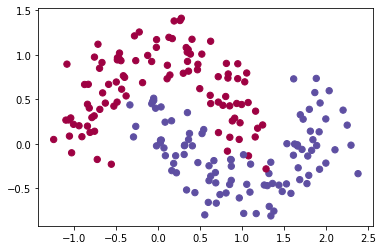

In [3]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

In [4]:
#X,Y = load_planar_dataset()

#### visualization

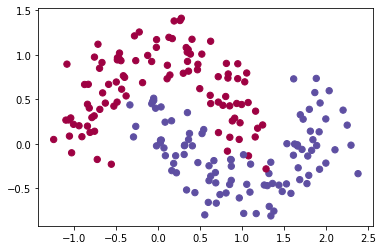

In [5]:
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral)

Data is:
- A np array matrix X which contains features(X1,X2)
- A np array Y containing labels (red: 0, blue:1)

In [6]:
x_shape = X.shape
y_shape = Y.shape
m = Y.size

## 3 - Simple Logistic Regression 

In [7]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T.ravel())

LogisticRegressionCV()

Accuracy 85.5%


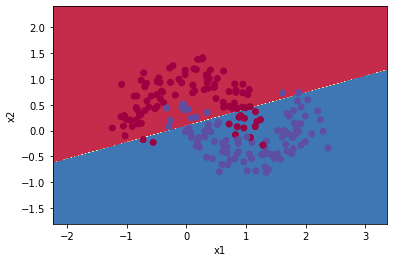

In [8]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y[0])

LR_predictions = clf.predict(X.T)
print("Accuracy " + str(int(np.dot(Y,LR_predictions) + np.dot(1-Y, 1-LR_predictions))/float(Y.size)*100) + "%")

Logistic regression success rate is only 47%

## 4 - Neural Network model

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:

<img src="https://github.com/csaybar/DLcoursera/blob/master/Neural%20Networks%20and%20Deep%20Learning/week3/Planar%20data%20classification%20with%20one%20hidden%20layer/images/classification_kiank.png?raw=1" style="width:600px;height:300px;">

### 4.1 - Neural network structure
- **n_x**: size of input layer
- **n_y**: size of output layer
- **n_h**: size of hidden layer

In [9]:
def layer_sizes(X,Y):
    """
    args:
     x -> input dataset of shape(input size, number of examples)
     y -> labels of the shape(output size, number of examples)
    
    returns:
     
    n_x: size of input layer
    n_y: size of output layer
    n_h: size of hidden layer
    """
    return (X.shape[0],4,Y.shape[0])

### 4.2 -Initialize the model params

In [10]:
def init_params(n_x, n_h, n_y):
    """
    Args:
     n_x: size of input layer
     n_y: size of output layer
     n_h: size of hidden layer
    Return:
     params -> dictionary
        W1 -> weight matrix of shape (n_h, n_x)
        b1 -> bias vector of shape (n_h, 1)
        W1 -> weight matrix of shape (n_y, n_h)
        b1 -> bias vector of shape (n_y, 1)
        
    """
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h)* 0.01
    b2 = np.zeros((n_y,1))
    
    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    return params

In [11]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = init_params(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


### 4.3 - Forward propagation

In [12]:
def forward_propagation(X, params):
    """
    Args:
    X -> input data of size (n_x, m)
    params -> python dictionary containing your parameters (output of initialization function)
    
    Return:
    A2 -> The sigmoid output of the second activation
    cache -> a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }

    return A2, cache


Example

In [13]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419913 -0.0004969633532317802 0.0004381874509591466 0.500109546852431


Computing the cost function:

In [14]:
def compute_cost(A2, Y, params):
    """
    Args:
     A2 -> the activation of last layer
     Y -> labels of the shape
     params -> a dictionary containing "W1", "b1", "W2" and "b2"
    Return:
     Cost -> cross entropy of the given cost  equation
    """
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),1 - Y)
    cost = -1/m * np.sum(logprobs)

    cost = np.squeeze(cost)

    return cost

In [15]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761265


### Creating backward_propagation

In [16]:
def backward_propagation(params, cache, X, Y):
    """
    Args:
     params -> a dictionary containing "W1", "b1", "W2" and "b2"
     cache -> a dictionary containing "Z1", "A1", "Z2" and "A2"
     X -> input data of size (n_x, m)
     Y -> labels of the shape
    Return:
     grads -> a dictionary containing gradients of params
    """
    m = X.shape[1]
    
    W1 = params['W1']
    W2 = params['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dZ2= A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), (1 - np.power(A1, 2)))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {
        "dW1":dW1,
        "db1":db1,
        "db2":db2,
        "dW2":dW2
    }
    return grads

In [17]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


#### Updating the Params

In [18]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [19]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


### Final model

In [20]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    """
    Args:
     X -> input data of size (n_x, m)
     Y -> labels of the shape
     n_h -> size of hidden layer
     num_iterations -> Number of iterations in gradient descent loop
     print_cost -> if True, print the cost every 1000 iterations
    
    Returns:
     params -> parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]

    parameters = init_params(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0,num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)

        if print_cost and i%1000 == 0:
            print("Cost after " + str(i) + "iteration " + str(cost))
    
    return parameters

In [21]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

C:\Users\HP\AppData\Local\Temp\ipykernel_14028\2713692464.py:11: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),1 - Y)
c:\Users\HP\road-to-cnn\NN-with-one-hidden-layer\planar_utils.py:34: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.18503221  5.33202068]
 [-7.53804031  1.20755589]
 [-4.19293977  5.32619812]
 [ 7.53799615 -1.20758084]]
b1 = [[ 2.32933849]
 [ 3.8100126 ]
 [ 2.33010276]
 [-3.81008759]]
W2 = [[-6033.82350033 -6008.14291323 -6033.0877268   6008.0793796 ]]
b2 = [[-52.67929251]]


In [22]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, _cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)  # Vectorized
    
    return predictions

In [23]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after 0iteration 0.6929986513791372
Cost after 1000iteration 0.09128496650351625
Cost after 2000iteration 0.04396623920847463
Cost after 3000iteration 0.04146418617780371
Cost after 4000iteration 0.04020038800044552
Cost after 5000iteration 0.03925679928906307
Cost after 6000iteration 0.038343553475228685
Cost after 7000iteration 0.037598364050181486
Cost after 8000iteration 0.0370539706621048
Cost after 9000iteration 0.036655939737574535


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

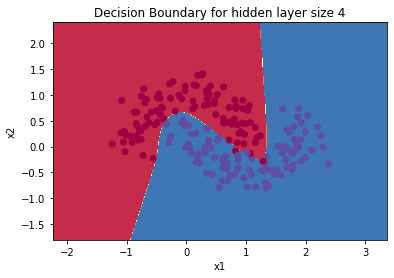

In [24]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size " + str(4))

In [25]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 98%


Accuracy for 1 hidden units: 85.0 %
Accuracy for 2 hidden units: 85.5 %
Accuracy for 3 hidden units: 98.5 %
Accuracy for 4 hidden units: 98.5 %
Accuracy for 5 hidden units: 98.5 %
Accuracy for 20 hidden units: 98.5 %


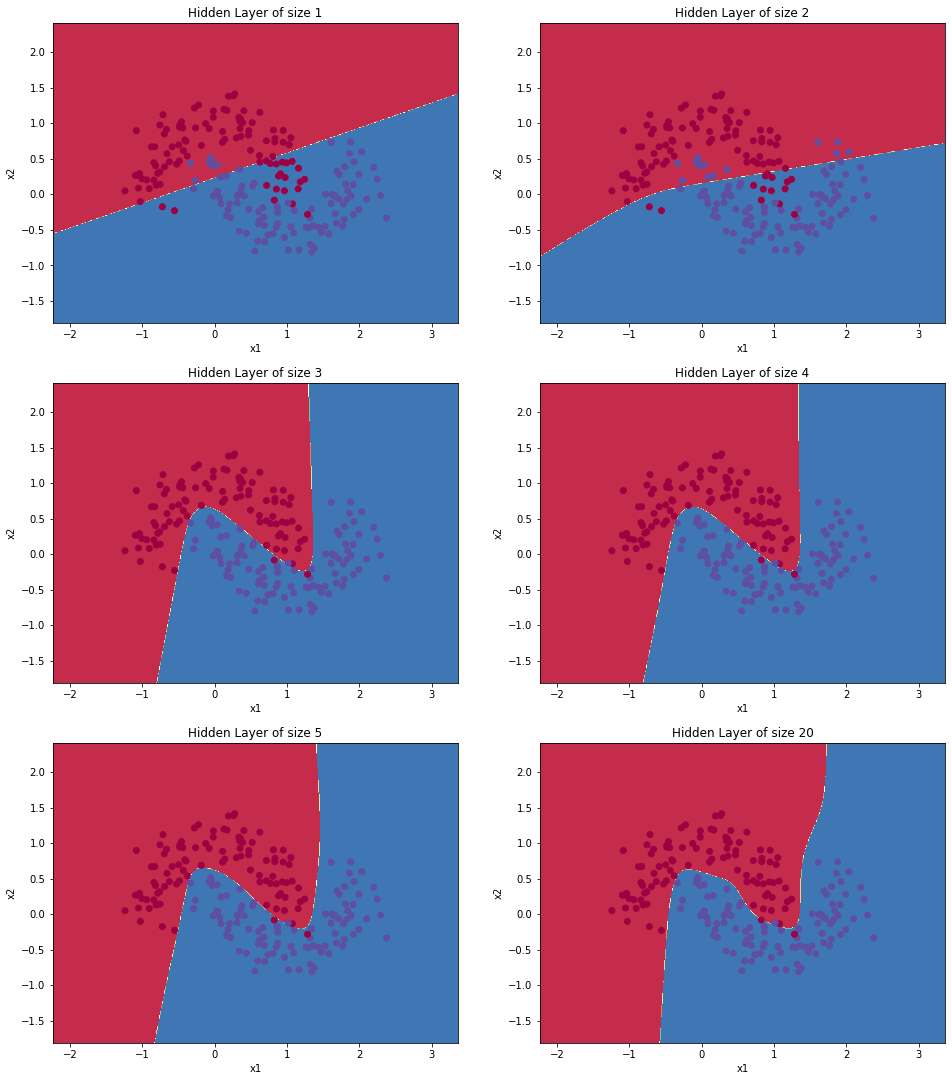

In [26]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))